In [1]:
!pip install spacy matplotlib pandas wordcloud seaborn
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 101.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import spacy
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Configurar matplotlib para mostrar caracteres en español
plt.rcParams['font.family'] = 'DejaVu Sans'

In [3]:
def cargar_documento(ruta_archivo):
    """
    Función para cargar un documento de texto
    """
    try:
        with open(ruta_archivo, 'r', encoding='utf-8') as archivo:
            contenido = archivo.read()
        return contenido
    except FileNotFoundError:
        print(f"❌ Error: No se encontró el archivo en {ruta_archivo}")
        return None
    except UnicodeDecodeError:
        # Intentar con diferentes codificaciones
        try:
            with open(ruta_archivo, 'r', encoding='latin-1') as archivo:
                contenido = archivo.read()
            return contenido
        except:
            print(f"❌ Error: No se pudo leer el archivo {ruta_archivo}")
            return None

# Cargar el documento
ruta_archivo = "/content/IreneVallejo Texto.txt"
texto_original = cargar_documento(ruta_archivo)

In [4]:
texto_original

'Irene Vallejo, la cazadora de libros: crónica de un encuentro con la nueva integrante de la Academia Colombiana de la Lengua\nLa autora de ‘El Infinito en un junco’ visitó Colombia para asistir al congreso de Asocajas. También se posesionó como miembro de la Academia Colombiana de la Lengua.\n\nIrene Vallejo, escritora española.\nIrene Vallejo, escritora española. | Foto: Foto: James Rajotte\n\nSantiago Cruz Hoyos\n12 de oct de 2024, 08:54 p. m.\n\nActualizado el 12 de oct de 2024, 08:54 p. m.\n\nSigue el canal de El País Cali en WhatsApp\n\nPor Santiago Cruz Hoyos - Editor de Crónicas y Reportajes\n\nLos lectores a veces cazan libros en lugares insospechados. Irene Vallejo recuerda haber encontrado uno en una carretera. Alguien lo habrá lanzado de un carro – quién sabe – y las huellas de los neumáticos estaban sobre su lomo. Irene se detuvo y observó aquella portada atropellada: ‘Las aventuras de Huckleberry Finn’, de Mark Twain, decía.\n\nElla se lo llevó a su casa con la sensación 

**Análisis básico de texto**

In [5]:
def analisis_basico(texto):
    """
    Realizar análisis básico del texto
    """
    estadisticas = {
        'total_caracteres': len(texto),
        'total_caracteres_sin_espacios': len(texto.replace(' ', '')),
        'total_palabras': len(texto.split()),
        'total_lineas': len(texto.split('\n')),
        'total_parrafos': len([p for p in texto.split('\n\n') if p.strip()])
    }
    return estadisticas

stats = analisis_basico(texto_original)

print("📈 Estadísticas generales:")
for clave, valor in stats.items():
    print(f"   • {clave.replace('_', ' ').title()}: {valor:,}")

print()

📈 Estadísticas generales:
   • Total Caracteres: 19,109
   • Total Caracteres Sin Espacios: 15,869
   • Total Palabras: 3,300
   • Total Lineas: 107
   • Total Parrafos: 41



In [6]:
def preprocesar_texto(texto, mantener_puntuacion=False):
    """
    Preprocesar el texto eliminando elementos no deseados
    """
    # Convertir a minúsculas
    texto_limpio = texto.lower()

    # Eliminar saltos de línea extras
    texto_limpio = re.sub(r'\n+', ' ', texto_limpio)

    # Eliminar espacios múltiples
    texto_limpio = re.sub(r'\s+', ' ', texto_limpio)

    if not mantener_puntuacion:
        # Eliminar signos de puntuación
        texto_limpio = re.sub(r'[^\w\s]', ' ', texto_limpio)
        texto_limpio = re.sub(r'\s+', ' ', texto_limpio)

    return texto_limpio.strip()

# Preprocesar texto manteniendo puntuación para análisis
texto_con_puntuacion = preprocesar_texto(texto_original, mantener_puntuacion=True)
texto_sin_puntuacion = preprocesar_texto(texto_original, mantener_puntuacion=False)

print("✅ Texto preprocesado")
print(f"📋 Texto con puntuación (primeros 150 chars):")
print(texto_con_puntuacion[:150] + "...")
print()
print(f"📋 Texto sin puntuación (primeros 150 chars):")
print(texto_sin_puntuacion[:150] + "...")
print()

✅ Texto preprocesado
📋 Texto con puntuación (primeros 150 chars):
irene vallejo, la cazadora de libros: crónica de un encuentro con la nueva integrante de la academia colombiana de la lengua la autora de ‘el infinito...

📋 Texto sin puntuación (primeros 150 chars):
irene vallejo la cazadora de libros crónica de un encuentro con la nueva integrante de la academia colombiana de la lengua la autora de el infinito en...



In [8]:
def contar_elementos(texto_original, texto_limpio):
    """
    Contar palabras y signos de puntuación
    """
    # Contar palabras
    palabras = texto_limpio.split()
    conteo_palabras = Counter(palabras)

    # Contar signos de puntuación
    signos_puntuacion = re.findall(r'[^\w\s]', texto_original)
    conteo_puntuacion = Counter(signos_puntuacion)

    return conteo_palabras, conteo_puntuacion

conteo_palabras, conteo_puntuacion = contar_elementos(texto_original, texto_sin_puntuacion)

# Mostrar las 10 palabras más frecuentes
print("📊 Las 10 palabras más frecuentes:")
for palabra, frecuencia in conteo_palabras.most_common(10):
    print(f"   • '{palabra}': {frecuencia} veces")

print()

# Mostrar signos de puntuación más frecuentes
print("📊 Signos de puntuación más frecuentes:")
for signo, frecuencia in conteo_puntuacion.most_common(5):
    print(f"   • '{signo}': {frecuencia} veces")

print()

📊 Las 10 palabras más frecuentes:
   • 'de': 171 veces
   • 'que': 133 veces
   • 'en': 114 veces
   • 'la': 96 veces
   • 'el': 93 veces
   • 'y': 80 veces
   • 'a': 73 veces
   • 'los': 58 veces
   • 'un': 55 veces
   • 'libros': 43 veces

📊 Signos de puntuación más frecuentes:
   • ',': 270 veces
   • '.': 148 veces
   • '‘': 31 veces
   • '’': 30 veces
   • ':': 27 veces



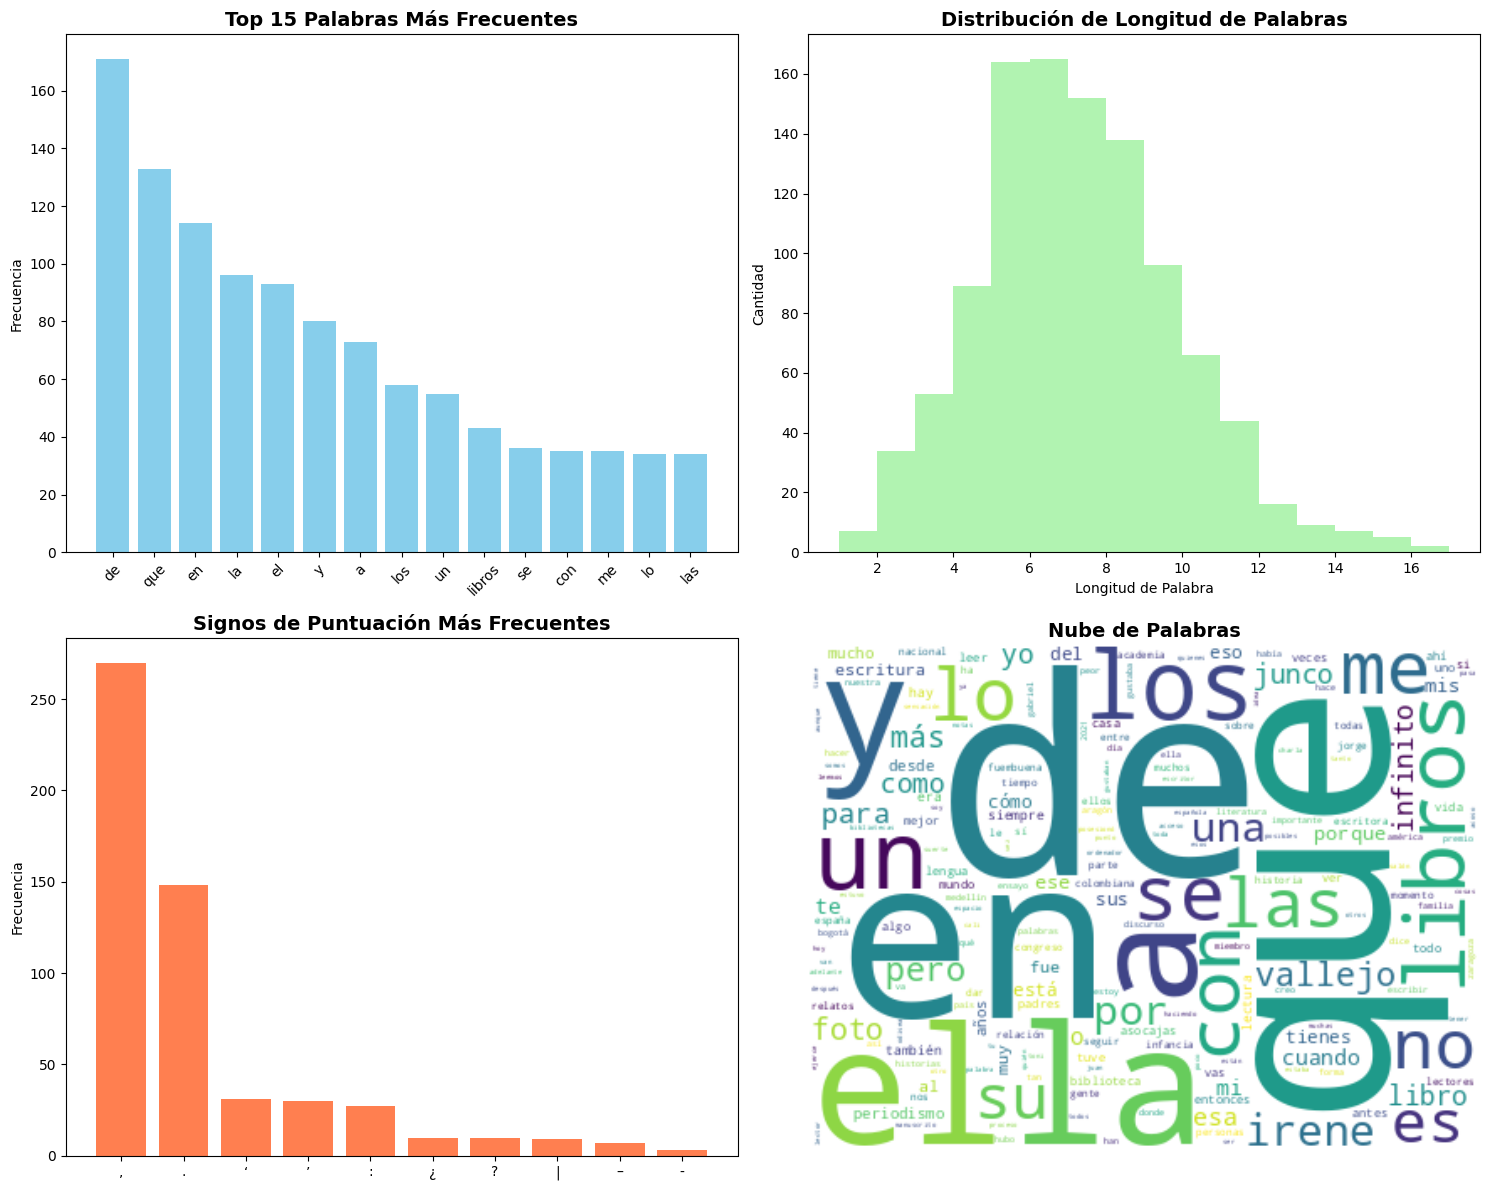

In [9]:
# Crear visualización de palabras frecuentes
def visualizar_frecuencias(conteo_palabras, conteo_puntuacion):
    """
    Crear visualizaciones de frecuencias
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Gráfico 1: Top 15 palabras más frecuentes
    palabras_top = dict(conteo_palabras.most_common(15))
    ax1.bar(palabras_top.keys(), palabras_top.values(), color='skyblue')
    ax1.set_title('Top 15 Palabras Más Frecuentes', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Frecuencia')
    ax1.tick_params(axis='x', rotation=45)

    # Gráfico 2: Distribución de longitud de palabras
    longitudes = [len(palabra) for palabra in conteo_palabras.keys()]
    ax2.hist(longitudes, bins=range(1, max(longitudes)+2), color='lightgreen', alpha=0.7)
    ax2.set_title('Distribución de Longitud de Palabras', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Longitud de Palabra')
    ax2.set_ylabel('Cantidad')

    # Gráfico 3: Signos de puntuación
    if conteo_puntuacion:
        signos_top = dict(conteo_puntuacion.most_common(10))
        ax3.bar(signos_top.keys(), signos_top.values(), color='coral')
        ax3.set_title('Signos de Puntuación Más Frecuentes', fontsize=14, fontweight='bold')
        ax3.set_ylabel('Frecuencia')
    else:
        ax3.text(0.5, 0.5, 'No hay signos de puntuación', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Signos de Puntuación', fontsize=14, fontweight='bold')

    # Gráfico 4: Nube de palabras
    if len(conteo_palabras) > 0:
        wordcloud = WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(conteo_palabras)
        ax4.imshow(wordcloud, interpolation='bilinear')
        ax4.axis('off')
        ax4.set_title('Nube de Palabras', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

visualizar_frecuencias(conteo_palabras, conteo_puntuacion)

In [10]:
# Cargar el modelo de spaCy para español
try:
    nlp = spacy.load("es_core_news_sm")
    print("✅ Modelo de spaCy cargado correctamente")
except OSError:
    print("❌ Error: Modelo de spaCy no encontrado. Ejecuta: python -m spacy download es_core_news_sm")
    nlp = None

if nlp:
    # Procesar el texto con spaCy
    doc = nlp(texto_original)

    # Extraer tokens
    tokens = [token.text for token in doc if not token.is_space]
    tokens_sin_puntuacion = [token.text for token in doc if not token.is_punct and not token.is_space]
    tokens_lematizados = [token.lemma_ for token in doc if not token.is_punct and not token.is_space and not token.is_stop]

    print(f"📊 Total de tokens: {len(tokens)}")
    print(f"📊 Tokens sin puntuación: {len(tokens_sin_puntuacion)}")
    print(f"📊 Tokens lematizados (sin stopwords): {len(tokens_lematizados)}")

    print(f"\n📋 Primeros 15 tokens:")
    print(tokens[:15])

    print(f"\n📋 Primeros 15 tokens sin puntuación:")
    print(tokens_sin_puntuacion[:15])

    print(f"\n📋 Primeros 15 tokens lematizados:")
    print(tokens_lematizados[:15])

    print()

✅ Modelo de spaCy cargado correctamente
📊 Total de tokens: 3829
📊 Tokens sin puntuación: 3289
📊 Tokens lematizados (sin stopwords): 1372

📋 Primeros 15 tokens:
['Irene', 'Vallejo', ',', 'la', 'cazadora', 'de', 'libros', ':', 'crónica', 'de', 'un', 'encuentro', 'con', 'la', 'nueva']

📋 Primeros 15 tokens sin puntuación:
['Irene', 'Vallejo', 'la', 'cazadora', 'de', 'libros', 'crónica', 'de', 'un', 'encuentro', 'con', 'la', 'nueva', 'integrante', 'de']

📋 Primeros 15 tokens lematizados:
['Irene', 'Vallejo', 'cazadora', 'libro', 'crónica', 'encuentro', 'integrante', 'Academia', 'Colombiana', 'Lengua', 'autora', 'Infinito', 'junco', 'visitar', 'Colombia']



🔍 PASO 7: Análisis morfológico...
--------------------------------------------------
📊 Análisis de categorías gramaticales (POS):
   • NOUN: 632 tokens
   • DET: 507 tokens
   • ADP: 473 tokens
   • PUNCT: 468 tokens
   • VERB: 424 tokens
   • PRON: 310 tokens
   • PROPN: 309 tokens
   • ADV: 153 tokens
   • ADJ: 150 tokens
   • AUX: 145 tokens
   • CCONJ: 117 tokens
   • SCONJ: 110 tokens
   • NUM: 17 tokens
   • SYM: 11 tokens
   • INTJ: 3 tokens

📋 Muestra del análisis detallado (primeras 10 filas):
   token    lemma   pos   tag  is_alpha  is_stop  is_punct
   Irene    Irene PROPN PROPN      True    False     False
 Vallejo  Vallejo PROPN PROPN      True    False     False
       ,        , PUNCT PUNCT     False    False      True
      la       el   DET   DET      True     True     False
cazadora cazadora  NOUN  NOUN      True    False     False
      de       de   ADP   ADP      True     True     False
  libros    libro  NOUN  NOUN      True    False     False
       :        : PU

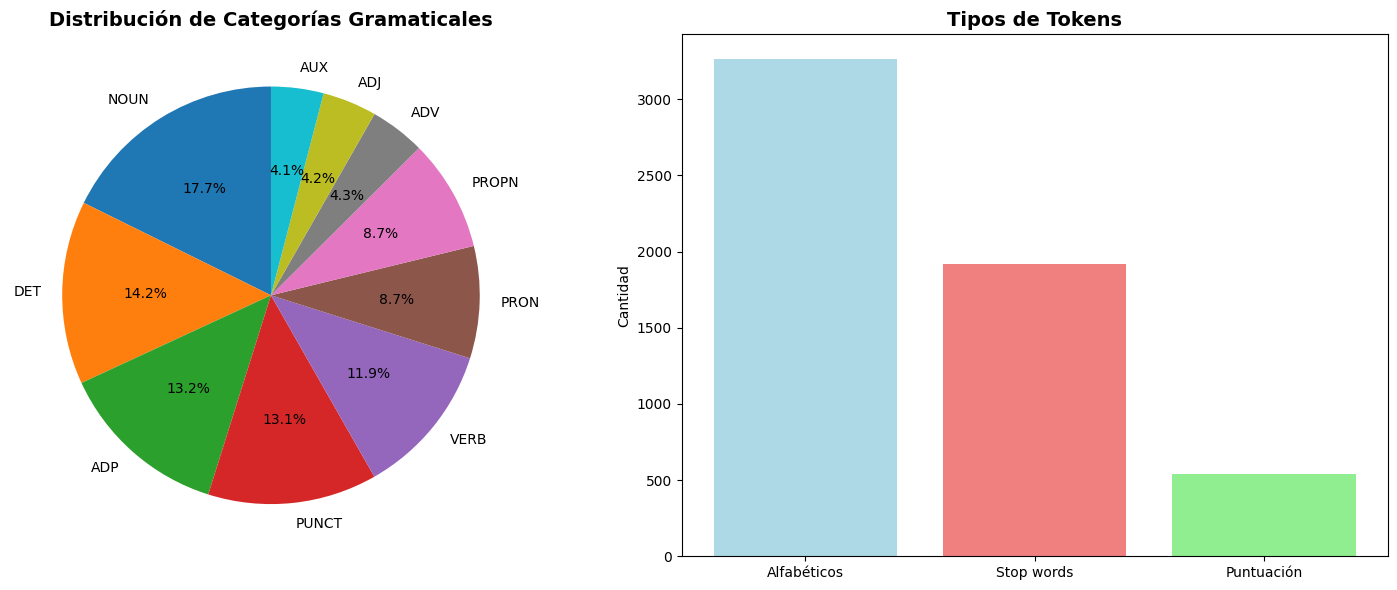

In [13]:
# PASO 7: ANÁLISIS MORFOLÓGICO
# ============================================================================
print("🔍 PASO 7: Análisis morfológico...")
print("-" * 50)

def analizar_morfologia(doc):
    """
    Analizar características morfológicas del texto
    """
    pos_tags = [token.pos_ for token in doc if not token.is_space]
    pos_counter = Counter(pos_tags)

    # Crear DataFrame para análisis detallado
    datos_tokens = []
    for token in doc:
        if not token.is_space:
            datos_tokens.append({
                'token': token.text,
                'lemma': token.lemma_,
                'pos': token.pos_,
                'tag': token.tag_,
                'is_alpha': token.is_alpha,
                'is_stop': token.is_stop,
                'is_punct': token.is_punct
            })

    df_tokens = pd.DataFrame(datos_tokens)
    return pos_counter, df_tokens

pos_counter, df_tokens = analizar_morfologia(doc)

print("📊 Análisis de categorías gramaticales (POS):")
for pos, count in pos_counter.most_common():
    print(f"   • {pos}: {count} tokens")

print(f"\n📋 Muestra del análisis detallado (primeras 10 filas):")
print(df_tokens.head(10).to_string(index=False))

# Visualizar análisis morfológico
def visualizar_morfologia(pos_counter, df_tokens):
    """
    Crear visualizaciones del análisis morfológico
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Gráfico 1: Distribución de POS tags
    pos_data = dict(pos_counter.most_common(10))
    ax1.pie(pos_data.values(), labels=pos_data.keys(), autopct='%1.1f%%', startangle=90)
    ax1.set_title('Distribución de Categorías Gramaticales', fontsize=14, fontweight='bold')

    # Gráfico 2: Comparación de tipos de tokens
    tipos_tokens = {
        'Alfabéticos': len(df_tokens[df_tokens['is_alpha'] == True]),
        'Stop words': len(df_tokens[df_tokens['is_stop'] == True]),
        'Puntuación': len(df_tokens[df_tokens['is_punct'] == True])
    }

    ax2.bar(tipos_tokens.keys(), tipos_tokens.values(), color=['lightblue', 'lightcoral', 'lightgreen'])
    ax2.set_title('Tipos de Tokens', fontsize=14, fontweight='bold')
    ax2.set_ylabel('Cantidad')

    plt.tight_layout()
    plt.show()

visualizar_morfologia(pos_counter, df_tokens)

print()

📊 Se encontraron 225 entidades nombradas:

🏷️ PER:
   • Actualizado (aparece 1 vez/veces)
   • También (aparece 2 vez/veces)
   • Fernando Carrillo (aparece 1 vez/veces)
   • Había (aparece 1 vez/veces)
   • Foto Jorge Fuembuena (aparece 2 vez/veces)
   • Pensaban (aparece 1 vez/veces)
   • Heraldo de Aragón (aparece 2 vez/veces)
   • Gabriel García Márquez (aparece 2 vez/veces)
   • Más (aparece 1 vez/veces)
   • Juan Gabriel Vásquez (aparece 2 vez/veces)
   • Juana de Ibarbourou (aparece 1 vez/veces)
   • Evelio Rosero (aparece 1 vez/veces)
   • Rosa Montero (aparece 1 vez/veces)
   • Emily Dickinson (aparece 1 vez/veces)
   • Después (aparece 1 vez/veces)
   • Después Julio Flórez (aparece 1 vez/veces)
   • Irene Vallejo (aparece 19 vez/veces)
   • Horacio Quiroga (aparece 1 vez/veces)
   • James Rajotte (aparece 1 vez/veces)
   • jamás (aparece 1 vez/veces)
   • Fernando Vallejo (aparece 1 vez/veces)
   • Foto Jorge Fuembuena
Lleva (aparece 1 vez/veces)
   • Pegó (aparece 1 vez/vec

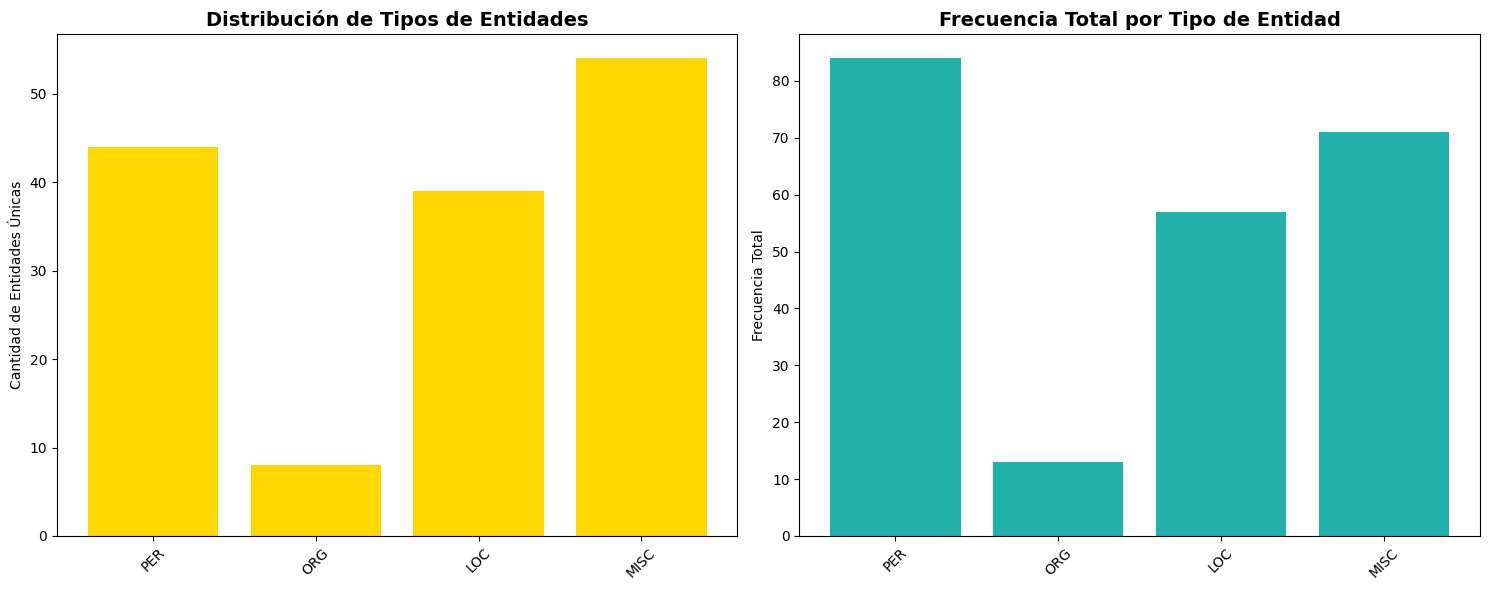


📄 TEXTO CON ENTIDADES RESALTADAS:
**[Irene Vallejo](PER)**, la cazadora de libros: crónica de un encuentro con la nueva integrante de la **[Academia Colombiana de la Lengua
La autora de](ORG)** **[‘](PER)**El **[Infinito](PER)** en un junco’ visitó **[Colombia](LOC)** para asistir al congreso de **[Asocajas](LOC)**. **[También](PER)** se posesionó como miembro de la **[Academia Colombiana de la Lengua](ORG)**.

**[Irene Vallejo](PER)**, escritora española.
**[Irene Vallejo](PER)**, escritora española. | **[Foto: Foto:](MISC)** **[James Rajotte](PER)**

**[Santiago Cruz Hoyos](LOC)**
12 de oct de 2024, 08:54 p. m.

**[Actualizado](PER)** el 12 de oct de 2024, 08:54 p. m.

**[Sigue](PER)** el canal de El **[País Cali](LOC)** en **[WhatsApp](LOC)**

Por **[Santiago Cruz Hoyos - Editor de Crónicas](LOC)** y **[Reportajes](LOC)**

Los lectores a veces cazan libros en lugares insospechados. **[Irene Vallejo](PER)** recuerda haber encontrado uno en una carretera. **[Alguien](LOC)** lo habrá 

In [14]:
if nlp:
    # Extraer entidades nombradas
    entidades = [(ent.text, ent.label_, ent.start_char, ent.end_char) for ent in doc.ents]

    if entidades:
        print(f"📊 Se encontraron {len(entidades)} entidades nombradas:")
        print()

        # Mostrar entidades por categoría
        entidades_por_tipo = {}
        for texto, etiqueta, inicio, fin in entidades:
            if etiqueta not in entidades_por_tipo:
                entidades_por_tipo[etiqueta] = []
            entidades_por_tipo[etiqueta].append(texto)

        for tipo, lista_entidades in entidades_por_tipo.items():
            print(f"🏷️ {tipo}:")
            for entidad in set(lista_entidades):  # Usar set para evitar duplicados
                frecuencia = lista_entidades.count(entidad)
                print(f"   • {entidad} (aparece {frecuencia} vez/veces)")
            print()

        # Crear DataFrame de entidades para análisis
        df_entidades = pd.DataFrame(entidades, columns=['Entidad', 'Tipo', 'Inicio', 'Fin'])

        print("📋 Tabla detallada de entidades:")
        print(df_entidades.to_string(index=False))

        # Visualizar entidades
        def visualizar_entidades(entidades_por_tipo, df_entidades):
            """
            Crear visualizaciones de las entidades nombradas
            """
            if not entidades_por_tipo:
                print("No hay entidades para visualizar")
                return

            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

            # Gráfico 1: Distribución por tipo de entidad
            tipos_count = {tipo: len(set(entidades)) for tipo, entidades in entidades_por_tipo.items()}
            ax1.bar(tipos_count.keys(), tipos_count.values(), color='gold')
            ax1.set_title('Distribución de Tipos de Entidades', fontsize=14, fontweight='bold')
            ax1.set_ylabel('Cantidad de Entidades Únicas')
            ax1.tick_params(axis='x', rotation=45)

            # Gráfico 2: Frecuencia total por tipo
            freq_total = {tipo: len(entidades) for tipo, entidades in entidades_por_tipo.items()}
            ax2.bar(freq_total.keys(), freq_total.values(), color='lightseagreen')
            ax2.set_title('Frecuencia Total por Tipo de Entidad', fontsize=14, fontweight='bold')
            ax2.set_ylabel('Frecuencia Total')
            ax2.tick_params(axis='x', rotation=45)

            plt.tight_layout()
            plt.show()

        visualizar_entidades(entidades_por_tipo, df_entidades)

        # Mostrar texto con entidades resaltadas
        def mostrar_texto_con_entidades(doc):
            """
            Mostrar el texto con las entidades resaltadas
            """
            print("\n📄 TEXTO CON ENTIDADES RESALTADAS:")
            print("=" * 60)

            texto_resaltado = doc.text
            # Ordenar entidades por posición (de atrás hacia adelante para no afectar índices)
            entidades_ordenadas = sorted(doc.ents, key=lambda x: x.start_char, reverse=True)

            for ent in entidades_ordenadas:
                inicio, fin = ent.start_char, ent.end_char
                texto_resaltado = (texto_resaltado[:inicio] +
                                 f"**[{ent.text}]({ent.label_})**" +
                                 texto_resaltado[fin:])

            print(texto_resaltado)
            print("=" * 60)

        mostrar_texto_con_entidades(doc)

    else:
        print("❌ No se encontraron entidades nombradas en el texto")

else:
    print("❌ No se puede realizar NER sin el modelo de spaCy")

print()